<a href="https://colab.research.google.com/github/charles2994/Team-recognition/blob/main/SOCCER_VIDEO_Napoli_Object_detection_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow==2.8
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

^C
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 60 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 12s (34.6 MB/s)
(Reading database ... 155639 files and directories currently installed.)
Removing libcudnn8-dev (8.0.5.39-1+cuda11.1) ...
(Reading database ... 155617 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77

Clone TENSORFLOW github repository 

In [ ]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
  !git clone --depth 1 https://github.com/tensorflow/models

Cloning into 'models'...
remote: Enumerating objects: 3421, done.
remote: Counting objects: 100% (3421/3421), done.
remote: Compressing objects: 100% (2854/2854), done.
remote: Total 3421 (delta 892), reused 1409 (delta 510), pack-reused 0
Receiving objects: 100% (3421/3421), 35.13 MiB | 11.52 MiB/s, done.
Resolving deltas: 100% (892/892), done.


From cloned repository install tensorflow object APIs 

In [ ]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1694828 sha256=599afaa28c69409962e5edc2af42c30f0c993d4f228a82773195e385d6c13da0
  Stored in directory: /tmp/pip-ephem-wheel-cache-70ihk2ca/wheels/fa/a4/d2/e9a5057e414fd46c8e543d2706cd836d64e1fcd9eccceb2329
  Created wheel for py-cpuinfo: filename=py_cpuinfo-8.0.0-py3-none-any.whl size=22257 sha256=b39f0b451fde2ccb3dfaa5de4d2152cc1979a84c5b2a84ed8a3a13e399078b71
  Stored in directory: /root/.cache/pip/wheels/d2/f1/1f/041add21dc9c4220157f1bd2bd6afe1f1a49524c3396b94401
  Created wheel for dill: filename=dill-0.3.1.1-py3-none-any.whl size=78544 sha256=1d64271917556a062cd3af214bd3aa63bf491ceafed55bc691fd576d37e0ee3a
  Stored in directory: /root/.cache/pip/wheels/a4/61/fd/c57e374e580aa78a45ed78d5859b3a44436af17e22ca53284f
  Created wheel for avro-python3: filename=avro_p

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
multiprocess 0.70.13 requires dill>=0.3.5.1, but you have dill 0.3.1.1 which is incompatible.
gym 0.17.3 requires cloudpickle<1.7.0,>=1.2.0, but you have cloudpickle 2.1.0 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,

Import Packages 

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import os
import random
import io
import imageio
import glob
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont
from IPython.display import display, Javascript
from IPython.display import Image as IPyImage

import tensorflow as tf

from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
#run model builder test
!python /content/models/research/object_detection/builders/model_builder_tf2_test.py

2022-07-14 23:53:06.634253: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
W0714 23:53:07.045344 139870257538944 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.7s
I0714 23:53:07.333668 139870257538944 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 0.7s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.58s
I0714 23:53:07.917977 139870257538944 test_util.py:2459] time(__main__.ModelBuilderTF2Test.test_crea

This code helps visualize the prediction and box bounding

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path.

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

def plot_detections(image_np,
                    boxes,
                    classes,
                    scores,
                    category_index,
                    figsize=(12, 16),
                    image_name=None):
  """Wrapper function to visualize detections.

  Args:
    image_np: uint8 numpy array with shape (img_height, img_width, 3)
    boxes: a numpy array of shape [N, 4]
    classes: a numpy array of shape [N]. Note that class indices are 1-based,
      and match the keys in the label map.
    scores: a numpy array of shape [N] or None.  If scores=None, then
      this function assumes that the boxes to be plotted are groundtruth
      boxes and plot all boxes as black with no classes or scores.
    category_index: a dict containing category dictionaries (each holding
      category index `id` and category name `name`) keyed by category indices.
    figsize: size for the figure.
    image_name: a name for the image file.
  """
  image_np_with_annotations = image_np.copy()
  viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_annotations,
      boxes,
      classes,
      scores,
      category_index,
      use_normalized_coordinates=True,
      min_score_thresh=0.8)
  if image_name:
    plt.imsave(image_name, image_np_with_annotations)
  else:
    plt.imshow(image_np_with_annotations)

Preparation Of Dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="B8QXQaigq9lZkz5H77w6")
project = rf.workspace("charles2994-spdui").project("napoli-player-identification")
dataset = project.version(1).download("tfrecord")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 4.3 MB/s 
     |████████████████████████████████| 178 kB 39.3 MB/s 
     |████████████████████████████████| 3.1 MB 52.7 MB/s 
     |████████████████████████████████| 1.1 MB 39.2 MB/s 
     |████████████████████████████████| 21.8 MB 1.4 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 138 kB 56.2 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.8-py3-none-any.whl size=24083 sha256=1e0e7a89d0cb4d5808be9e33c9ba1294bd1ce679708ef084cf0de109049bd582
  Stored in directory: /root/.cache/pip/wheels/e4/93/36/f49178ad94df3ebf42a8a5e860b265fd85cbc8a467bfc72a2f
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=9b5a5ef269c3e1c8921cfc0b502fdce4bc563f5a27107d28e7fbb90ad9c5308d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to NAPOLI-PLAYER-IDENTIFICATION-1 in tfrecord:: 100%|██████████| 11/11 [00:00<00:00, 2533.07it/s]


In [ ]:
# NOTE: Tfrecords folder for BARCELONA 
test_record_fname = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/test/NAPOLI.tfrecord'
train_record_fname = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train/NAPOLI.tfrecord'
label_map_pbtxt_fname = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train/NAPOLI_label_map.pbtxt'

Configure the EfficientDet for customization


In [ ]:
##change chosen model to deploy different models available in the TF2 object detection zoo
MODELS_CONFIG = {
    'efficientdet-d0': {
        'model_name': 'efficientdet_d0_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d0_coco17_tpu-32.tar.gz',
        'batch_size': 4
    },
    'efficientdet-d1': {
        'model_name': 'efficientdet_d1_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d1_640x640_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d1_coco17_tpu-32.tar.gz',
        'batch_size': 4
    },
    'efficientdet-d2': {
        'model_name': 'efficientdet_d2_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d2_768x768_coco17_tpu-8.config',
        'pretrained_checkpoint': 'efficientdet_d2_coco17_tpu-32.tar.gz',
        'batch_size': 4
    },
        'efficientdet-d3': {
        'model_name': 'efficientdet_d3_coco17_tpu-32',
        'base_pipeline_file': 'ssd_efficientdet_d3_896x896_coco17_tpu-32.config',
        'pretrained_checkpoint': 'efficientdet_d3_coco17_tpu-32.tar.gz',
        'batch_size': 4
    }
}

#in this tutorial we implement the lightweight, smallest state of the art efficientdet model
#if you want to scale up tot larger efficientdet models you will likely need more compute!
chosen_model = 'efficientdet-d0'

num_steps = 6000 #The more steps, the longer the training. Increase if your loss function is still decreasing and validation metrics are increasing. 
num_eval_steps = 500 #Perform evaluation after so many steps

model_name = MODELS_CONFIG[chosen_model]['model_name']
pretrained_checkpoint = MODELS_CONFIG[chosen_model]['pretrained_checkpoint']
base_pipeline_file = MODELS_CONFIG[chosen_model]['base_pipeline_file']
batch_size = MODELS_CONFIG[chosen_model]['batch_size'] #if you can fit a large batch in memory, it may speed up your training

In [ ]:
#download pretrained weights
%mkdir "/content/models/research/deploy/"
%cd "/content/models/research/deploy/"
import tarfile
download_tar = 'http://download.tensorflow.org/models/object_detection/tf2/20200711/' + pretrained_checkpoint

!wget {download_tar}
tar = tarfile.open(pretrained_checkpoint)
tar.extractall()
tar.close()

/content/models/research/deploy
--2022-07-14 23:54:30--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.203.128, 2404:6800:4008:c03::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30736482 (29M) [application/x-tar]
Saving to: ‘efficientdet_d0_coco17_tpu-32.tar.gz’

efficientdet_d0_coc 100%[===================>]  29.31M   154MB/s    in 0.2s    

2022-07-14 23:54:30 (154 MB/s) - ‘efficientdet_d0_coco17_tpu-32.tar.gz’ saved [30736482/30736482]



In [ ]:
#download base training configuration file
%cd /content/models/research/deploy
download_config = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/' + base_pipeline_file
!wget {download_config}

/content/models/research/deploy
--2022-07-14 23:54:31--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4630 (4.5K) [text/plain]
Saving to: ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’

ssd_efficientdet_d0 100%[===================>]   4.52K  --.-KB/s    in 0s      

2022-07-14 23:54:31 (59.6 MB/s) - ‘ssd_efficientdet_d0_512x512_coco17_tpu-8.config’ saved [4630/4630]



In [ ]:
#prepare
pipeline_fname = '/content/models/research/deploy/' + base_pipeline_file
fine_tune_checkpoint = '/content/models/research/deploy/' + model_name + '/checkpoint/ckpt-0'

def get_num_classes(pbtxt_fname):
    from object_detection.utils import label_map_util
    label_map = label_map_util.load_labelmap(pbtxt_fname)
    categories = label_map_util.convert_label_map_to_categories(
        label_map, max_num_classes=90, use_display_name=True)
    category_index = label_map_util.create_category_index(categories)
    return len(category_index.keys())
num_classes = get_num_classes(label_map_pbtxt_fname)

In [ ]:
num_classes

1

In [ ]:
#write custom configuration file by slotting our dataset, model checkpoint, and training parameters into the base pipeline file

import re

%cd "/content/models/research/deploy"
print('writing custom configuration file')

with open(pipeline_fname) as f:
    s = f.read()
with open('pipeline_file.config', 'w') as f:
    
    # fine_tune_checkpoint
    s = re.sub('fine_tune_checkpoint: ".*?"',
               'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), s)
    
    # tfrecord files train and test.
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 'input_path: "{}"'.format(train_record_fname), s)
    s = re.sub(
        '(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 'input_path: "{}"'.format(test_record_fname), s)

    # label_map_path
    s = re.sub(
        'label_map_path: ".*?"', 'label_map_path: "{}"'.format(label_map_pbtxt_fname), s)

    # Set training batch_size.
    s = re.sub('batch_size: [0-9]+',
               'batch_size: {}'.format(batch_size), s)

    # Set training steps, num_steps
    s = re.sub('num_steps: [0-9]+',
               'num_steps: {}'.format(num_steps), s)
    
    # Set number of classes num_classes.
    s = re.sub('num_classes: [0-9]+',
               'num_classes: {}'.format(num_classes), s)
    
    #fine-tune checkpoint type
    s = re.sub(
        'fine_tune_checkpoint_type: "classification"', 'fine_tune_checkpoint_type: "{}"'.format('detection'), s)
        
    f.write(s)

/content/models/research/deploy
writing custom configuration file


In [ ]:
#This line of code is a sanity check for the model
%cat /content/models/research/deploy/pipeline_file.config


 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 1
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

pipeline_file: location of custom training configuration declared below /n

model_dir: the location that the tensorboard logs and saved model checkpoints will save to declared below 

In [ ]:
pipeline_file = '/content/models/research/deploy/pipeline_file.config'
model_dir = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train'

num_train_steps:  /n

num_eval_steps: /n

RUN TRAINING

In [ ]:
!python /content/models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_file} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}

2022-07-13 11:16:57.588469: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0713 11:16:57.712365 139792008161152 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 6000
I0713 11:16:57.715963 139792008161152 config_util.py:552] Maybe overwriting train_steps: 6000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I0713 11:16:57.716121 139792008161152 config_util.py:552] Maybe overwriting use_bfloat16: False
I0713 11:16:57.723292 139792008161152 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b0
I0713 11:16:57.723396 139792008161152 ssd_efficientnet_bifpn_feature_extractor.py:147] Ef

EVALUATION OF MODEL FOR PERFORMANCE METRICS 

Should show loss grapghs for inspection

In [ ]:
%load_ext tensorboard
%tensorboard --logdir '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train/train'

<IPython.core.display.Javascript object>

CODESECTIONS BELOW HELP CHOOSE A CHECKPOINT AND EXPORT TO A .PY file 

In [ ]:
#see where the model saved weights
%ls '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train'

NAPOLI_label_map.pbtxt  NAPOLI.tfrecord


In [ ]:
#run conversion script
import re
import numpy as np

output_directory = '/content/drive/MyDrive/SOCCER_Object_Detection/Napoli_model'

#place the model weights you would like to export here
last_model_path = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train'
print(last_model_path)
!python /content/models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {last_model_path} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_file}

/content/NAPOLI-PLAYER-IDENTIFICATION-1/train
2022-07-14 23:55:21.878791: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
I0714 23:55:21.893508 139938123687808 ssd_efficientnet_bifpn_feature_extractor.py:146] EfficientDet EfficientNet backbone version: efficientnet-b0
I0714 23:55:21.893730 139938123687808 ssd_efficientnet_bifpn_feature_extractor.py:147] EfficientDet BiFPN num filters: 64
I0714 23:55:21.893819 139938123687808 ssd_efficientnet_bifpn_feature_extractor.py:149] EfficientDet BiFPN num iterations: 3
I0714 23:55:21.897693 139938123687808 efficientnet_model.py:143] round_filter input=32 output=32
I0714 23:55:21.921544 139938123687808 efficientnet_model.py:143] round_filter input=32 output=32
I0714 23:55:21.921716 139938123687808 efficientnet_model.py:143] round_filter input=16 output=16
I0714 23:55:21.990191 139938123687808 efficientnet_model.py:143] round_filter input=16 output=16
I0714 23:55

In [ ]:
%ls '/content/fine_tuned_model_Napoli/saved_model/'

ls: cannot access '/content/fine_tuned_model_Napoli/saved_model/': No such file or directory


TRY ON TEST IMAGES 

In [ ]:
import cv2
vidcap = cv2.VideoCapture('/content/drive/MyDrive/SOCCER_Object_Detection/deepsort_30sec (1).mp4')
count = 0 
def getFrame(sec):
   vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000)
   hasFrames,image = vidcap.read()
   if hasFrames:
       cv2.imwrite("/content/drive/MyDrive/SOCCER_Object_Detection/Frame"+str(count)+".jpg", image)     # save frame as JPG file
   return hasFrames
sec = 2
frameRate = 2 #//it will capture image in each 0.5 second
count=88
success = getFrame(sec)
while success:
   count = count + 1
   sec = sec + frameRate
   sec = round(sec, 2)
   success = getFrame(sec)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

import io
import cv2
import scipy.misc
import numpy as np
from six import BytesIO
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import config_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder

%matplotlib inline

In [ ]:
%ls '/content/NAPOLI-PLAYER-IDENTIFICATION-1/train'

NAPOLI_label_map.pbtxt  NAPOLI.tfrecord


In [ ]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

In [ ]:
def load_model(model_name):
  base_url = 'http://download.tensorflow.org/models/object_detection/'
  model_file = model_name + '.tar.gz'
  model_dir = tf.keras.utils.get_file(
    fname=model_name, 
    origin=base_url + model_file,
    untar=True)

  model_dir = pathlib.Path(model_dir)/"saved_model"

  model = tf.saved_model.load(str(model_dir))

  return model

In [ ]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/content/NAPOLI-PLAYER-IDENTIFICATION-1/test/NAPOLI_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

In [ ]:
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = pathlib.Path('/content/drive/MyDrive/SOCCER_Object_Detection/Frames')
TEST_IMAGE_PATHS = sorted(list(PATH_TO_TEST_IMAGES_DIR.glob("*.jpg")))
TEST_IMAGE_PATHS

[PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame100.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame101.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame88.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame89.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame90.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame91.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame92.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame93.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame94.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame95.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame96.jpg'),
 PosixPath('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/Frame97.jpg'),
 PosixPath('/content/drive

In [ ]:
#model_name = 'ssd_mobilenet_v1_coco_2017_11_17'
#detection_model = load_model(model_name)
detection_model = tf.saved_model.load('/content/drive/MyDrive/models/research/object_detection/Inference_graph/saved_model')

In [ ]:
print(detection_model.signatures['serving_default'].inputs)

[<tf.Tensor 'input_tensor:0' shape=(1, None, None, 3) dtype=uint8>, <tf.Tensor 'unknown:0' shape=() dtype=resource>, <tf.Tensor 'unknown_0:0' shape=() dtype=resource>, <tf.Tensor 'unknown_1:0' shape=() dtype=resource>, <tf.Tensor 'unknown_2:0' shape=() dtype=resource>, <tf.Tensor 'unknown_3:0' shape=() dtype=resource>, <tf.Tensor 'unknown_4:0' shape=() dtype=resource>, <tf.Tensor 'unknown_5:0' shape=() dtype=resource>, <tf.Tensor 'unknown_6:0' shape=() dtype=resource>, <tf.Tensor 'unknown_7:0' shape=() dtype=resource>, <tf.Tensor 'unknown_8:0' shape=() dtype=resource>, <tf.Tensor 'unknown_9:0' shape=() dtype=resource>, <tf.Tensor 'unknown_10:0' shape=() dtype=resource>, <tf.Tensor 'unknown_11:0' shape=() dtype=resource>, <tf.Tensor 'unknown_12:0' shape=() dtype=resource>, <tf.Tensor 'unknown_13:0' shape=() dtype=resource>, <tf.Tensor 'unknown_14:0' shape=() dtype=resource>, <tf.Tensor 'unknown_15:0' shape=() dtype=resource>, <tf.Tensor 'unknown_16:0' shape=() dtype=resource>, <tf.Tenso

In [ ]:
detection_model.signatures['serving_default'].output_dtypes

{'detection_anchor_indices': tf.float32,
 'detection_boxes': tf.float32,
 'detection_classes': tf.float32,
 'detection_multiclass_scores': tf.float32,
 'detection_scores': tf.float32,
 'num_detections': tf.float32,
 'raw_detection_boxes': tf.float32,
 'raw_detection_scores': tf.float32}

In [ ]:
detection_model.signatures['serving_default'].output_shapes

{'detection_anchor_indices': TensorShape([1, 100]),
 'detection_boxes': TensorShape([1, 100, 4]),
 'detection_classes': TensorShape([1, 100]),
 'detection_multiclass_scores': TensorShape([1, 100, 1]),
 'detection_scores': TensorShape([1, 100]),
 'num_detections': TensorShape([1]),
 'raw_detection_boxes': TensorShape([1, 49104, 4]),
 'raw_detection_scores': TensorShape([1, 49104, 1])}

In [ ]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: the file path to the image

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [ ]:
#recover our saved model
pipeline_config = pipeline_file
#generally you want to put the last ckpt from training in here
model_dir = '/content/drive/MyDrive/SOCCER_Object_Detection/Napoli_model'
configs = config_util.get_configs_from_pipeline_file(pipeline_config)
model_config = configs['model']
detection_model = model_builder.build(
      model_config=model_config, is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(
      model=detection_model)
ckpt.restore(os.path.join('/content/drive/MyDrive/SOCCER_Object_Detection/Napoli_model/checkpoint/ckpt-0'))


def get_model_detection_function(model):
  """Get a tf.function for detection."""

  @tf.function
  def detect_fn(image):
    """Detect objects in image."""

    image, shapes = model.preprocess(image)
    prediction_dict = model.predict(image, shapes)
    detections = model.postprocess(prediction_dict, shapes)

    return detections, prediction_dict, tf.reshape(shapes, [-1])

  return detect_fn

detect_fn = get_model_detection_function(detection_model)

In [ ]:
#map labels for inference decoding
label_map_path = configs['eval_input_config'].label_map_path
label_map = label_map_util.load_labelmap(label_map_path)
categories = label_map_util.convert_label_map_to_categories(
    label_map,
    max_num_classes=label_map_util.get_max_label_map_index(label_map),
    use_display_name=True)
category_index = label_map_util.create_category_index(categories)
label_map_dict = label_map_util.get_label_map_dict(label_map, use_display_name=True)

tf.Tensor([244.06319 450.15964 336.03293 465.38412], shape=(4,), dtype=float32) tf.Tensor([468.27032 511.2768  653.5176  550.5026 ], shape=(4,), dtype=float32)
tf.Tensor([281.2065  680.0892  390.44235 695.4068 ], shape=(4,), dtype=float32) tf.Tensor([423.57428 420.10715 589.5827  448.72592], shape=(4,), dtype=float32)


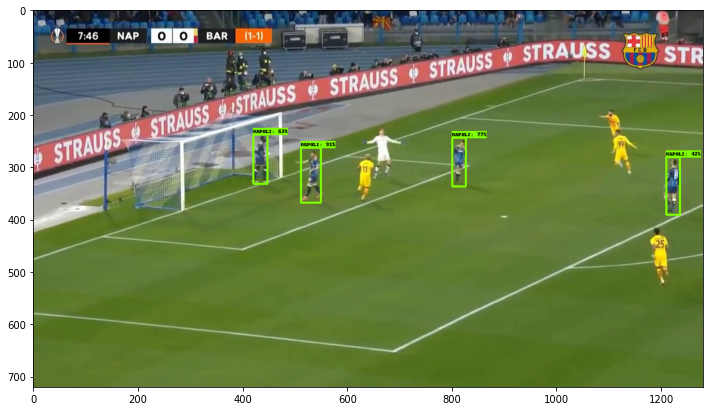

In [ ]:
#run detector on test image
#it takes a little longer on the first run and then runs at normal speed. 
import random

TEST_IMAGE_PATHS = glob.glob('/content/drive/MyDrive/SOCCER_Object_Detection/Frames/*.jpg')
image_path = random.choice(TEST_IMAGE_PATHS)
image_np = load_image_into_numpy_array(image_path)

input_tensor = tf.convert_to_tensor(
    np.expand_dims(image_np, 0), dtype=tf.float32)
detections, predictions_dict, shapes = detect_fn(input_tensor)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'][0].numpy(),
      (detections['detection_classes'][0].numpy() + label_id_offset).astype(int),
      detections['detection_scores'][0].numpy(),
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.3,
      agnostic_mode=False,
)

(im_width, im_height) = image_np.shape[:2]

ymin = detections['detection_boxes'][0][0]*im_height
xmin = detections['detection_boxes'][0][1]*im_width
ymax = detections['detection_boxes'][0][2]*im_height
xmax = detections['detection_boxes'][0][3]*im_width

plt.imshow(image_np_with_detections)

if detections['detection_scores'][0][0]>= 0.5: 
   print (xmin,ymin)
   print (xmax,ymax)
   plt.figure(figsize=(12,16))
   plt.imsave("/content/NAPOLI-PLAYER-IDENTIFICATION-1"+str(count)+".jpg", image_np_with_detections)
   plt.show()